In [1]:
import pandas as pd
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import difflib


In [2]:
top100 = pd.read_csv('../Day 2/top100.csv')

In [3]:
top100

,song,artist
0,mood,24kgoldn featuring iann dior
1,therefore i am,billie eilish
2,positions,ariana grande
3,i hope,gabby barrett featuring charlie puth
4,laugh now cry later,drake featuring lil durk
...,...,...
95,tap in,saweetie
96,rockstar chainz,future
97,kacey talk,youngboy never broke again
98,practice,dababy


In [4]:
spotify = pd.read_csv('../Day 3/spotify.csv')

In [5]:
spotify

,song,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Take Me To Church,Hozier,0.566,0.664,4,-5.303,0,0.0464,0.63400,0.000000,0.1160,0.437,128.945
1,Cooler Than Me - Single Mix,"Mike Posner, Gigamesh",0.768,0.820,7,-4.630,0,0.0475,0.17900,0.000000,0.7040,0.625,129.969
2,See You Again (feat. Kali Uchis),"Tyler, The Creator, Kali Uchis",0.558,0.559,6,-9.222,1,0.0959,0.37100,0.000007,0.1090,0.620,78.558
3,Pompeii,Bastille,0.679,0.715,9,-6.383,1,0.0407,0.07550,0.000000,0.2710,0.571,127.435
4,Hips Don't Lie (feat. Wyclef Jean),"Shakira, Wyclef Jean",0.778,0.824,10,-5.892,0,0.0712,0.28400,0.000000,0.4050,0.756,100.024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,Prisoner (feat. Dua Lipa),"Miley Cyrus, Dua Lipa",0.781,0.670,3,-3.912,0,0.0452,0.01030,0.000000,0.0761,0.595,127.990
4891,Therefore I Am,Billie Eilish,0.889,0.340,11,-7.773,0,0.0697,0.21800,0.130000,0.0550,0.716,94.009
4892,Dakiti,"Bad Bunny, Jhay Cortez",0.731,0.573,4,-10.059,0,0.0544,0.40100,0.000052,0.1130,0.145,109.928
4893,Levitating (feat. DaBaby),"Dua Lipa, DaBaby",0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977


In [6]:
list(spotify.columns)

['song',
 'artist',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

In [9]:
X=spotify[['danceability','energy','key','loudness', 'mode','speechiness', 'acousticness','instrumentalness',
                  'liveness', 'valence', 'tempo']]

In [10]:
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.566,0.664,4,-5.303,0,0.0464,0.63400,0.000000,0.1160,0.437,128.945
1,0.768,0.820,7,-4.630,0,0.0475,0.17900,0.000000,0.7040,0.625,129.969
2,0.558,0.559,6,-9.222,1,0.0959,0.37100,0.000007,0.1090,0.620,78.558
3,0.679,0.715,9,-6.383,1,0.0407,0.07550,0.000000,0.2710,0.571,127.435
4,0.778,0.824,10,-5.892,0,0.0712,0.28400,0.000000,0.4050,0.756,100.024
...,...,...,...,...,...,...,...,...,...,...,...
4890,0.781,0.670,3,-3.912,0,0.0452,0.01030,0.000000,0.0761,0.595,127.990
4891,0.889,0.340,11,-7.773,0,0.0697,0.21800,0.130000,0.0550,0.716,94.009
4892,0.731,0.573,4,-10.059,0,0.0544,0.40100,0.000052,0.1130,0.145,109.928
4893,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977


In [11]:
X.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,4895.000000,4895.00000,4895.000000,4895.000000,4895.000000,4895.000000,4895.000000,4895.000000,4895.000000,4895.000000,4895.000000
mean,0.665019,0.70186,5.284372,-5.980747,0.546885,0.102233,0.151891,0.025821,0.186446,0.516344,122.310246
std,0.134990,0.16672,3.638052,2.327428,0.497848,0.096488,0.199493,0.123302,0.140903,0.228903,26.286189
min,0.000000,0.04520,0.000000,-23.212000,0.000000,0.000000,0.000018,0.000000,0.019300,0.000000,0.000000
25%,0.580000,0.59550,2.000000,-7.009500,0.000000,0.040350,0.017750,0.000000,0.095200,0.340000,101.027500
50%,0.671000,0.72300,5.000000,-5.612000,1.000000,0.061500,0.068700,0.000000,0.130000,0.517000,123.935000
75%,0.756000,0.82700,8.000000,-4.460000,1.000000,0.124000,0.204500,0.000101,0.247500,0.697000,137.960000
max,0.979000,1.00000,11.000000,0.175000,1.000000,0.903000,0.987000,0.987000,0.957000,1.000000,210.857000


## Scaling

In [12]:
import pickle

scaler = StandardScaler().fit(X)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
    
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

X_prep = scaler.transform(X)

In [14]:
#s = scaler.transform(search)

# Model

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

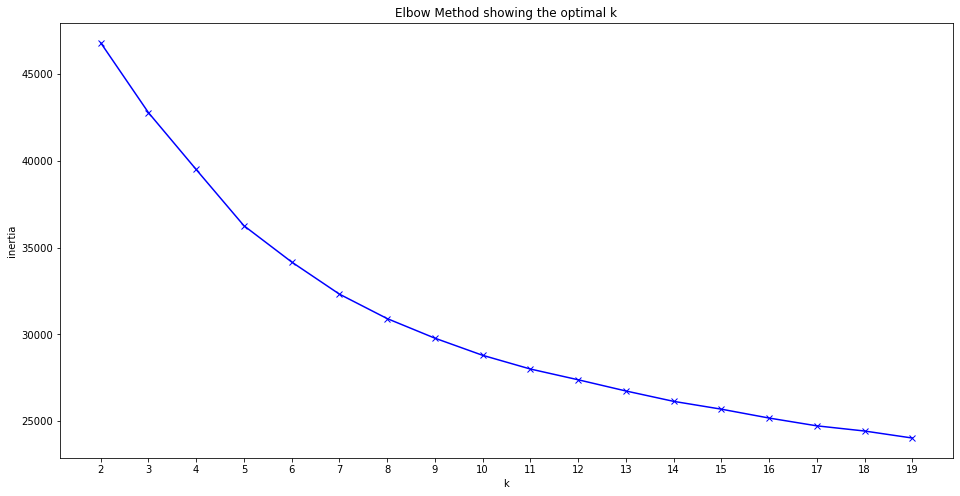

In [15]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

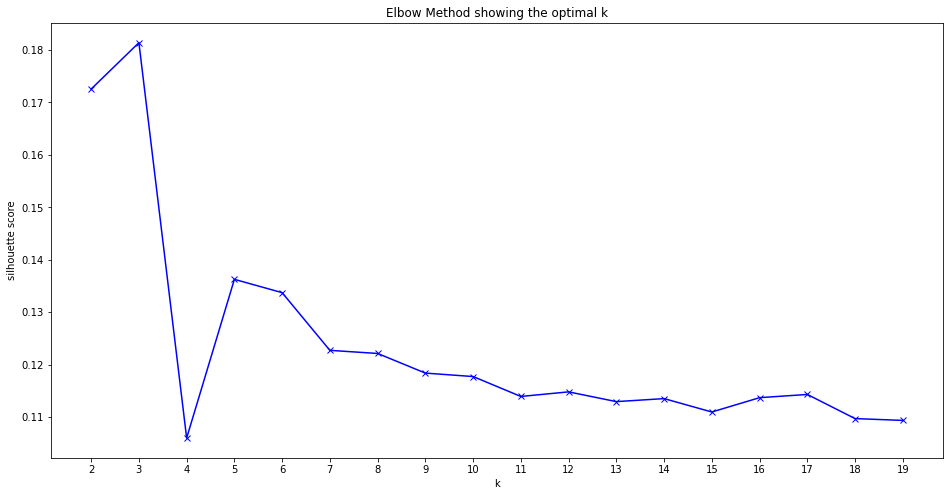

In [16]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [17]:
kmeans = KMeans(n_clusters=5, random_state=1234)
kmeans.fit(X_prep)

KMeans(n_clusters=5, random_state=1234)

In [18]:
with open('kmeans.pkl', 'wb') as file:
    pickle.dump(kmeans, file)
    
with open('kmeans.pkl', 'rb') as file:
    kmeans = pickle.load(file)

In [84]:
no = kmeans.predict(s)


In [85]:
no[0]

1

In [16]:
clusters = kmeans.predict(X_prep)
X_df = pd.DataFrame(X)
X_df["cluster"] = clusters
X_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.566,0.664,4,-5.303,0,0.0464,0.6340,0.000000,0.116,0.437,128.945,3
1,0.768,0.820,7,-4.630,0,0.0475,0.1790,0.000000,0.704,0.625,129.969,0
2,0.558,0.559,6,-9.222,1,0.0959,0.3710,0.000007,0.109,0.620,78.558,3
3,0.679,0.715,9,-6.383,1,0.0407,0.0755,0.000000,0.271,0.571,127.435,1
4,0.778,0.824,10,-5.892,0,0.0712,0.2840,0.000000,0.405,0.756,100.024,0


In [17]:
spot_clus= pd.concat([spotify[['song','artist']],X_df['cluster']], axis= 1 )

In [18]:
spot_clus

,song,artist,cluster
0,Take Me To Church,Hozier,3
1,Cooler Than Me - Single Mix,"Mike Posner, Gigamesh",0
2,See You Again (feat. Kali Uchis),"Tyler, The Creator, Kali Uchis",3
3,Pompeii,Bastille,1
4,Hips Don't Lie (feat. Wyclef Jean),"Shakira, Wyclef Jean",0
...,...,...,...
4890,Prisoner (feat. Dua Lipa),"Miley Cyrus, Dua Lipa",0
4891,Therefore I Am,Billie Eilish,0
4892,Dakiti,"Bad Bunny, Jhay Cortez",3
4893,Levitating (feat. DaBaby),"Dua Lipa, DaBaby",0


In [22]:
spot_clus[['artist','song']]=spot_clus[['artist','song']].astype(str)

In [23]:
spot_clus.to_csv(r'spotify_clusterd.csv', index=False)

# End